In [159]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#Importing my libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split



class SanardiAlgoChoice:
    def __init__(self, df, X, y, problem):
        self.df = df
        self.problem = problem
        self.test_size = 0.2
        self.X = X
        self.y = y
        
        
    def __str__(self):
        return "This Class needs you to pass as Argument either \"categorical\" or \"linear\" and accordingly will plot some preliminary model selection lots without further tuning as a stating point"
        
    def make_plots(self):
        
        
        
        #self.test_size = test_size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0) 
        models = []
        
        if self.problem == "linear":
            
            corr = self.df.corr()
            ax1 = sns.heatmap(corr, annot=True)
            ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
            ax1.set_ylim((0 ,7)) # set the ylim to bottom, top


            models.append(('LR', LinearRegression()))
            models.append(('KNN', KNeighborsRegressor()))
            models.append(('XGB',xgb.XGBRegressor(verbosity=0))) 
            models.append(('LassoR',Lasso()))
            models.append(('RidgeR',Ridge()))
            
        else:
            models.append(('LDA', LinearDiscriminantAnalysis()))
            models.append(('KNN', KNeighborsClassifier()))
            models.append(('TREE', DecisionTreeClassifier()))
            models.append(('NB', GaussianNB()))
            models.append(('SVM', SVC(C= 10, gamma = 'auto')))
        
        #10-fold cross validation:
        # prepare configuration for cross validation test harness
        seed = 7    
        results = []
        names = []
        scoring = 'accuracy'
        for name, model in models:
            kfold = model_selection.KFold(n_splits=10, random_state=seed)
            cv_results = model_selection.cross_val_score(model, X, y)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
            # boxplot algorithm comparison
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

In [160]:


advertising = pd.read_csv(r"C:\Users\bla\Desktop\DATgroup\jupyter_notebooks\datasets_advertising.csv")
advertising.head()



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [161]:


X = advertising['TV']
y = advertising['Sales']

X = np.asarray(X).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)



In [162]:
test = SanardiAlgoChoice(advertising, X, y, "linear")

LR: 0.803553 (0.029313)
KNN: 0.786882 (0.027560)
XGB: 0.706092 (0.045554)
LassoR: 0.803579 (0.029147)
RidgeR: 0.803553 (0.029313)


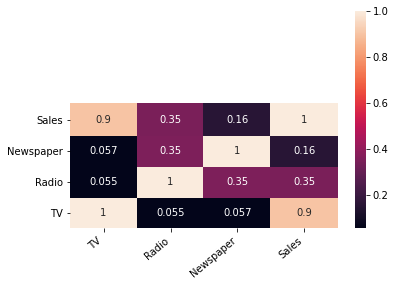

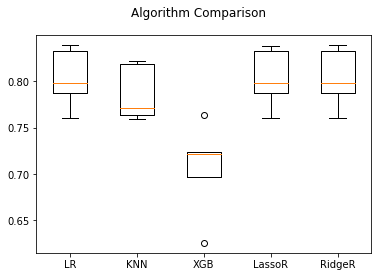

In [163]:
test.make_plots()

# A Classification example:

In [164]:
cars = pd.read_csv(r"C:\Users\bla\Desktop\DATgroup\jupyter_notebooks\data\cars.csv")

In [165]:
cars

,buying price,maintenance price,number of doors,person capacity,luggage boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [166]:
#This datasets needs some prep:
#the ratings are ordinal in nature, so I will convert them by hand for demonstration purposes:

buying_dict = {'vhigh':3, 'high':2, 'med':1, 'low':0}
maintenance_dict = {'vhigh':3, 'high':2, 'med':1, 'low':0}
luggage_dict = {'small':0, 'med':1, 'big':2}
safe_dict = {'low':0, 'med':1, 'high':2}
accept_dict = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

cars_encoded = pd.DataFrame()

cars_encoded["buying price"] = cars["buying price"].apply(lambda x: buying_dict[x])

cars_encoded["maintenance price"] = cars["maintenance price"].apply(lambda x: maintenance_dict[x])

cars_encoded["luggage boot"] = cars["luggage boot"].apply(lambda x: luggage_dict[x])

cars_encoded["safety"] = cars["safety"].apply(lambda x: safe_dict[x])


cars_encoded['person capacity'] = cars['person capacity'].astype(str).replace('more', 5).astype(int)
cars_encoded['number of doors'] = cars['number of doors'].astype(str).replace('5more', 5).astype(int)


cars_encoded['accept_encoded'] =  cars['acceptability'].apply(lambda x: accept_dict[x])

cars_encoded

,buying price,maintenance price,luggage boot,safety,person capacity,number of doors,accept_encoded
0,3,3,0,0,2,2,0
1,3,3,0,1,2,2,0
2,3,3,0,2,2,2,0
3,3,3,1,0,2,2,0
4,3,3,1,1,2,2,0
...,...,...,...,...,...,...,...
1723,0,0,1,1,5,5,2
1724,0,0,1,2,5,5,3
1725,0,0,2,0,5,5,0
1726,0,0,2,1,5,5,2


In [171]:
X = cars_encoded.iloc[:,:-1]
y = cars_encoded.iloc[:,-1]

In [172]:
test_cat = SanardiAlgoChoice(cars_encoded, X, y, "categorical")

LDA: 0.787608 (0.066091)
KNN: 0.820643 (0.036303)
TREE: 0.793498 (0.072545)
NB: 0.754077 (0.028581)
SVM: 0.890046 (0.022324)


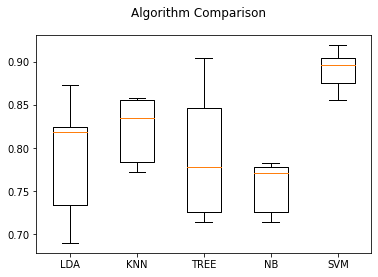

In [173]:
test_cat.make_plots()